## RAINFALL TIME SERIES FORECASTING - SIMPLE RNN - IMPLEMENTATION - KERALA - INDIA

In [2]:
import warnings
warnings.filterwarnings("ignore")

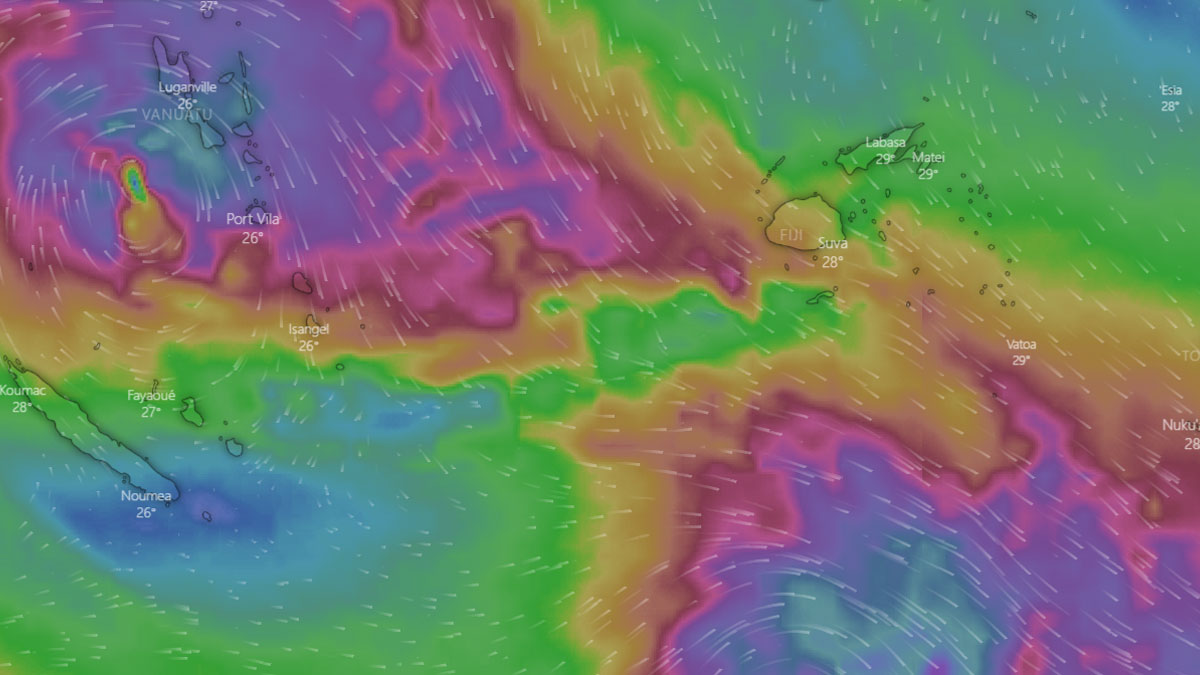

In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

## GENERAL DATASET ANALYSIS - ALL INDIA RAINFALL FORECASTING

In [6]:
# Loading Dataset
df = pd.read_csv("daily-rainfall-at-state-level.csv")
df.head()

,id,date,state_code,state_name,actual,rfs,normal,deviation
0,0,2009-01-01,5,Uttarakhand,0.0,0.003906,2.19,-100.0
1,1,2009-01-01,18,Assam,0.0,0.000000,0.52,-100.0
2,2,2009-01-01,16,Tripura,0.0,0.000000,0.09,-100.0
3,3,2009-01-01,36,Telangana,0.0,0.000000,0.17,-100.0
4,4,2009-01-01,2,Himachal Pradesh,0.0,0.008566,3.31,-100.0


In [7]:
# Shape
df.shape

(204876, 8)

In [8]:
# Columns
df.columns

Index(['id', 'date', 'state_code', 'state_name', 'actual', 'rfs', 'normal',
       'deviation'],
      dtype='object')

In [9]:
# Null Values
df.isnull().sum()

id                0
date              0
state_code        0
state_name        0
actual        17162
rfs            5865
normal        11518
deviation     31021
dtype: int64

In [10]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204876 entries, 0 to 204875
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          204876 non-null  int64  
 1   date        204876 non-null  object 
 2   state_code  204876 non-null  int64  
 3   state_name  204876 non-null  object 
 4   actual      187714 non-null  float64
 5   rfs         199011 non-null  float64
 6   normal      193358 non-null  float64
 7   deviation   173855 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 12.5+ MB


In [11]:
# Describe
df.describe()

,id,state_code,actual,rfs,normal,deviation
count,204876.000000,204876.000000,187714.000000,199011.000000,193358.000000,173855.000000
mean,102437.500000,19.166667,3.990693,9.643683,4.654058,38.516222
std,59142.751213,11.171668,9.512507,27.504865,7.369770,1367.744520
min,0.000000,1.000000,0.000000,0.000000,0.000000,-100.000000
25%,51218.750000,9.750000,0.000000,0.000000,0.420000,-100.000000
50%,102437.500000,18.500000,0.150000,0.063856,1.870000,-89.060000
75%,153656.250000,29.250000,3.890000,5.685068,6.760000,-9.045000
max,204875.000000,38.000000,283.000000,658.765073,97.680000,362300.000000


In [12]:
# Describe
df.describe(include= "O")

,date,state_name
count,204876,204876
unique,5691,36
top,2009-01-01,Uttarakhand
freq,36,5691


In [13]:
# Duplicates
df.duplicated().sum().sum()

0

In [14]:
df['date'] = pd.to_datetime(df['date'])

## STATE SPECIFIC RAINFALL FORECASTING- KERALA

In [16]:
# Specifying Kerala
df['Kerala'] = df['state_name'].apply(lambda x: 1 if x == 'Kerala' else 0)
kerala_df = df[df['state_name'] == 'Kerala'][['date','actual']]
kerala_df.head()

,date,actual
31,2009-01-01,0.38
66,2009-01-02,0.00
101,2009-01-03,0.00
136,2009-01-04,0.00
171,2009-01-05,0.00


In [17]:
kerala_df['date'] = pd.to_datetime(kerala_df['date'], format='mixed', dayfirst=True)

In [18]:
# Checking Null Values
kerala_df.isna().sum().sum()

170

In [19]:
# Dropping Null Values
kerala_df.dropna(inplace= True)

In [20]:
kerala_df

,date,actual
31,2009-01-01,0.38
66,2009-01-02,0.00
101,2009-01-03,0.00
136,2009-01-04,0.00
171,2009-01-05,0.00
...,...,...
194386,2024-03-16,0.18
194421,2024-03-17,0.00
194456,2024-03-18,0.00
194491,2024-03-19,0.12


In [21]:
# Daily --> Year
monthly_sum = df.groupby(df["date"].dt.to_period("Y"))["actual"].sum()

# Modifying Dataframe
kerala_df = monthly_sum.reset_index()
kerala_df['date'] = kerala_df['date'].astype(str)

In [22]:
# Modifying Dataframe
kerala_df = monthly_sum.reset_index()
kerala_df['year'] = kerala_df['date'].dt.year
kerala_df.set_index('year', inplace=True)

In [23]:
kerala_df.drop(['date'],axis =1,  inplace = True)
kerala_df

,actual
year,
2009,43972.34
2010,56283.52
2011,47904.82
2012,43867.97
2013,51388.17
2014,47196.60
2015,49210.91
2016,47432.15
2017,52270.59


## FINAL DATASET -- RAINFALL FORECASTING

In [41]:
# Filering --- 2015
kerala_df_2015 = kerala_df[kerala_df.index >= 2015]
kerala_df_2015

,actual
year,
2015,49210.91
2016,47432.15
2017,52270.59
2018,46087.77
2019,54463.86
2020,51831.02
2021,51168.53
2022,55269.78
2023,48694.33


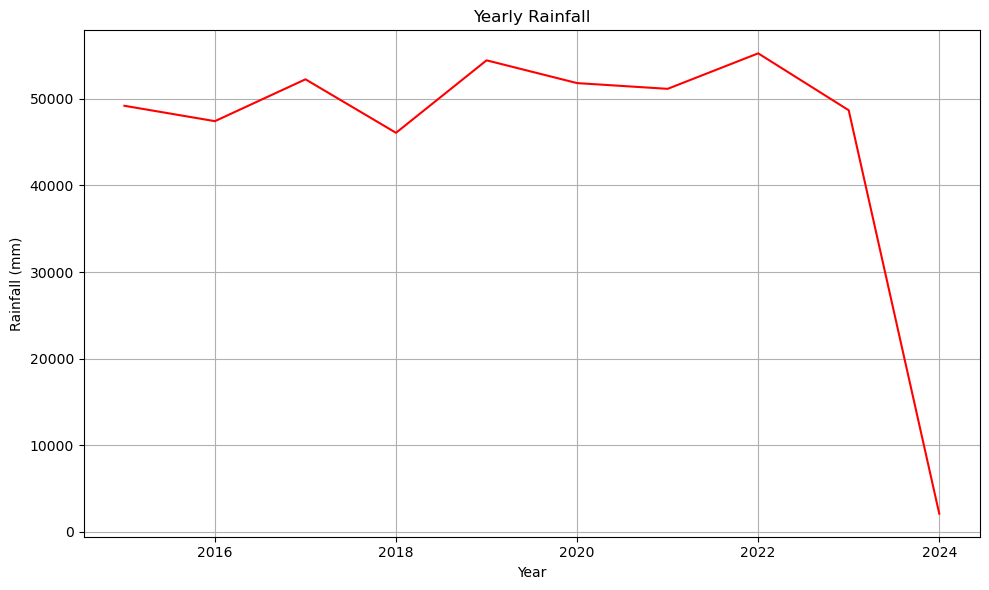

In [169]:
# Plot Data
plt.figure(figsize=(10, 6))
plt.plot(kerala_df_2015, color = "red")
plt.title("Yearly Rainfall")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# Length of the DataFrame
len(kerala_df_2015)

10

In [61]:
kerala_df_2015["actual"].value_counts()

actual
49210.91    1
47432.15    1
52270.59    1
46087.77    1
54463.86    1
51831.02    1
51168.53    1
55269.78    1
48694.33    1
2066.64     1
Name: count, dtype: int64

In [63]:
# Only select the 'actual' column
actual_data = kerala_df_2015['actual'].copy()

In [67]:
# Handle missing values
actual_data = actual_data.fillna(method='ffill')

In [69]:
#Reshape for scaler
actual_values = np.array(actual_data).reshape(-1, 1)

In [71]:
# Normalize the DataFrame
scaler = MinMaxScaler()
actual_scaled = scaler.fit_transform(actual_values)

In [73]:
print(actual_scaled.shape)  # Should be (10, 1)

(10, 1)


In [77]:
train_size = int(len(actual_scaled) * 0.7)  # 7
test_size = len(actual_scaled) - train_size  # 3

train_data = actual_scaled[:train_size]
test_data = actual_scaled[train_size:]

In [79]:
# Importing Time Series Generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

## TIME SERIES GENERATOR FOR RAINFALL PREDICTION

In [81]:
# Define generator parameters
n_input = 3  # number of time steps (years)
batch_size = 1

In [83]:
# Create the training generator
train_generator = TimeseriesGenerator(train_data, train_data, length=n_input, batch_size=batch_size)

In [85]:
# View first 3 sequences
for i in range(len(train_generator)):
    x, y = train_generator[i]
    print(f"Sequence {i+1}:")
    print("X (input):", x.flatten())
    print("Y (target):", y.flatten())
    print("-" * 40)

    if i == 2:  # Stop after 3 sequences
        break

Sequence 1:
X (input): [0.88611819 0.85268482 0.94362758]
Y (target): [0.82741601]
----------------------------------------
Sequence 2:
X (input): [0.85268482 0.94362758 0.82741601]
Y (target): [0.98485202]
----------------------------------------
Sequence 3:
X (input): [0.94362758 0.82741601 0.98485202]
Y (target): [0.93536547]
----------------------------------------


## MODEL CREATION -- RAINFALL FORECASTING

In [87]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(n_input, 1)),
    Dense(1)
])

In [89]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') # Regression Based

In [91]:
# Summary of the Model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

## FIT THE MODEL

In [93]:
# Fit the Model -- Learn the model
model.fit(train_generator, epochs=100, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.6514
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4323
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2551
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1038
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0504
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0041
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0100    
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0213
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0115    
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0080
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0030
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0016    
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030    
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037
Epo

## PREDICT NEXT YEAR - 2025 - EXPECTED PRECIPITATION - KERALA

In [100]:
# Use the last n_input values to make prediction
last_sequence = train_data[-n_input:].reshape((1, n_input, 1))

# Predict next value
predicted_scaled = model.predict(last_sequence)

# Inverse transform to original scale
predicted_value = scaler.inverse_transform(predicted_scaled)

print("Predicted next year 'precipitation (mm)' value:", predicted_value.flatten()[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted next year 'precipitation (mm)' value: 53929.168


## VISUALISING THE PRECIPITATION EXPECTED IN 2025 - KERALA

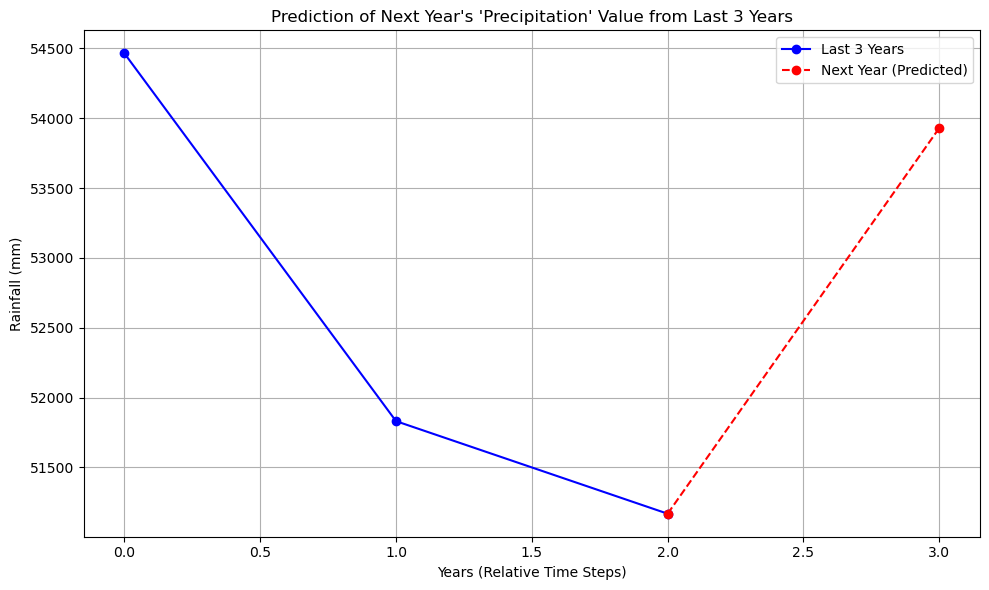

In [109]:
import matplotlib.pyplot as plt

# Get last known actual values (inverse transform)
known = scaler.inverse_transform(train_data[-n_input:].reshape(-1, 1))

# Combine known + predicted
all_values = list(known.flatten()) + [predicted_value.flatten()[0]]

# Increase figure size
plt.figure(figsize=(10, 6))

# Plot last 3 known values
plt.plot(range(3), all_values[:-1], marker='o', color='blue', label='Last 3 Years')

# Connect last known value to predicted with dashed red line
plt.plot([2, 3], all_values[2:], marker='o', color='red', linestyle='--', label='Next Year (Predicted)')

# Add legend and labels
plt.title("Prediction of Next Year's 'Precipitation' Value from Last 3 Years")
plt.xlabel("Years (Relative Time Steps)")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## PREDICTING THE PRECIPITATION EXPECTED FOR NEXT FIVE YEARS - KERALA

In [132]:
# Predict next 6 years starting from 2025 to 2030
future_predictions = []
input_seq = train_data[-n_input:].reshape(1, n_input, 1)

for _ in range(6):  # 2025 to 2030
    next_pred_scaled = model.predict(input_seq, verbose=0)
    future_predictions.append(next_pred_scaled[0, 0])

    # Reshape and update input sequence
    next_pred_scaled_reshaped = next_pred_scaled.reshape(1, 1, 1)
    input_seq = np.concatenate([input_seq[:, 1:, :], next_pred_scaled_reshaped], axis=1)

# Inverse transform to original scale
future_predictions_original = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate years from 2025 to 2030
future_years = list(range(2025, 2031))

# Print results
print("📈 Predicted 'Precipitation' values (mm):")
for year, value in zip(future_years, future_predictions_original.flatten()):
    print(f"{year}: {value:.2f}")


📈 Predicted 'Precipitation' values (mm):
2025: 53929.17
2026: 52886.41
2027: 54020.01
2028: 54448.36
2029: 54710.53
2030: 55310.82


## PREDICTING PRECIPITATION FORECAST FROM (2023-2030) - KERALA

In [152]:
# Predict 7 future values: 2024 to 2030
future_predictions = []
input_seq = train_data[-n_input:].reshape(1, n_input, 1)

for _ in range(7):  # 2024, 2025, ..., 2030
    next_pred_scaled = model.predict(input_seq, verbose=0)
    future_predictions.append(next_pred_scaled[0, 0])
    input_seq = np.concatenate([input_seq[:, 1:, :], next_pred_scaled.reshape(1, 1, 1)], axis=1)

# Convert to original scale
future_predictions_original = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [154]:
# Get 2023 known value
value_2023 = scaler.inverse_transform(train_data[-1].reshape(-1, 1)).flatten()[0]

# Split the future predictions
value_2024 = future_predictions_original[0, 0]  # First prediction
future_values = future_predictions_original[1:].flatten()  # Remaining 6 for 2025–2030

# Years
year_2023 = 2023
year_2024 = 2024
future_years = list(range(2025, 2031))  # 6 years

In [157]:
print("future_years:", len(future_years))       
print("future_values:", len(future_values))    

future_years: 6
future_values: 6


In [159]:
# To Minimize assertion error
assert len(future_years) == len(future_values)

## PRECIPITATION FORECAST - (2023 - 2030) - KERALA

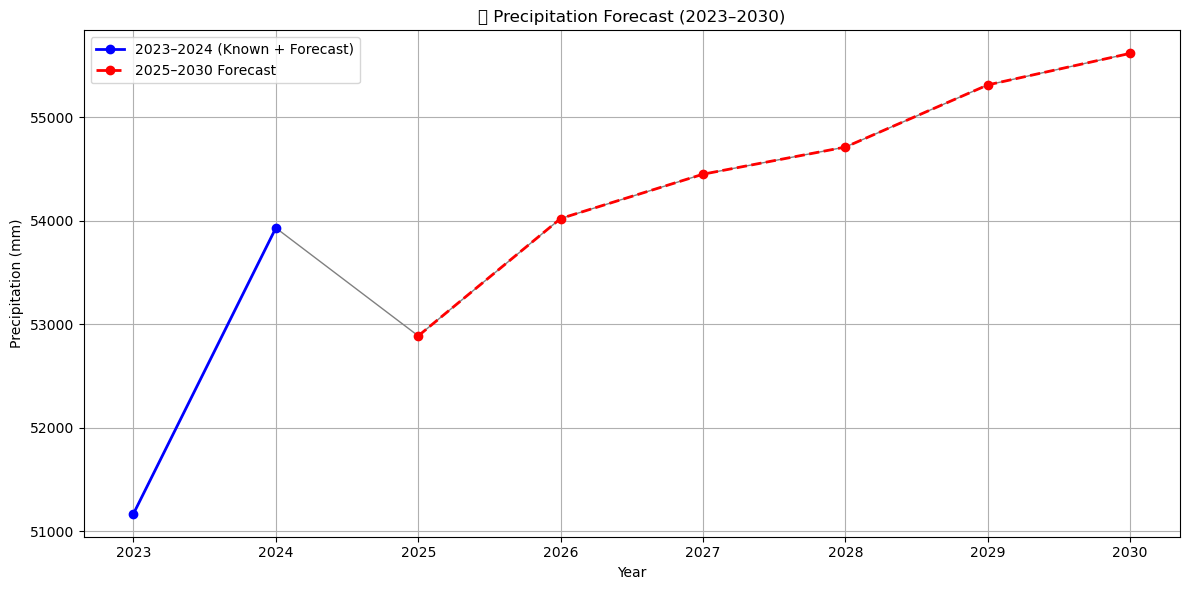

In [165]:
import matplotlib.pyplot as plt

# Combine all years and values (2023 to 2030)
all_years = [year_2023, year_2024] + future_years
all_values = [value_2023, value_2024] + list(future_values)

plt.figure(figsize=(12, 6))

# Plot full line (connected)
plt.plot(all_years, all_values, color='gray', linestyle='-', linewidth=1)  # base line for connection

# Overlay segments with color
plt.plot([year_2023, year_2024], [value_2023, value_2024],
         marker='o', color='blue', linewidth=2, label='2023–2024 (Known + Forecast)')

plt.plot(future_years, future_values,
         marker='o', linestyle='--', color='red', linewidth=2, label='2025–2030 Forecast')

# Labels and styling
plt.title("📈 Precipitation Forecast (2023–2030)")
plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [167]:
# Save the Model
model.save("precipitation_model.keras")